# Data Mining Lab 1 - part 2

---

## Table of Contents
0. Setup
1. Data Source
2. Data Preparation
3. Data Transformation
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Atrribute Transformation / Aggregation
 - 5.5 Dimensionality Reduction
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Data Classification

---

## 0. Setup

In [1]:
%matplotlib inline

In [2]:
!pip install -q fsspec

You should consider upgrading via the 'c:\users\user\documents\school_work\113-1-data_mining\lab_1\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import plotly.express as px

In [4]:
import numpy as np

In [5]:
import helpers.data_mining_helpers as dmh

In [6]:
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

In [8]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

---

## 1. Data Source

> - Loading data with panda

In [9]:
# To load the data
df = pd.read_csv("./Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [10]:
# To check if the data is ready
df[:10]

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
5,nostalgia,"Every time I heard this song as a child, I use..."
6,nostalgia,"My dad loved listening to Jim Reeves, when I w..."
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...
8,not nostalgia,Wherever you are you always in my heart
9,not nostalgia,Elvis will always be number one no one can com...


---

## 2. Data Preparation

> - Deciding the categories

In [11]:
df.sentiment.unique()

array(['not nostalgia', 'nostalgia'], dtype=object)

In [12]:
categories = ["nostalgia", "non-nostalgia"]

> - Checking how many lines of data

In [13]:
df.shape[0]

1500

> - Checking if there's any <strong style="color: orange;">NA</strong> inside the data

In [14]:
# This method counts how many non-NA cells in each column
df.count()

sentiment    1500
comment      1500
dtype: int64

## 3. Data Transformation

> Welp ... I am using panda just at starting cause it is way more simpler. 

> It's also what I learnt from previous classes about Data Science and custom in years.

> About the column adding it also comes w/ facing the situation, getting it ealry often require jumping edit. 

---

## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

In [15]:
df.isnull()

,sentiment,comment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1495,False,False
1496,False,False
1497,False,False
1498,False,False


In [16]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


> - Making a new line to simulated a row with null values

In [17]:
dummy_series = pd.Series([None, "DUMMY COMMENT"], index=["sentiment", "comment"])

In [18]:
dummy_series

sentiment             None
comment      DUMMY COMMENT
dtype: object

In [19]:
dummy_df = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

In [20]:
dummy_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,1,0


> - Clearing any row with null values

In [21]:
dummy_df[-2:]

,sentiment,comment
1499,nostalgia,This is the first CD I bought after my marriag...
1500,None,DUMMY COMMENT


In [22]:
dummy_df.dropna(inplace=True)

In [23]:
dummy_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [24]:
dummy_df[-2:]

,sentiment,comment
1498,nostalgia,I was born in 1954 and started to be aware of ...
1499,nostalgia,This is the first CD I bought after my marriag...


### 4.2 Dealing with Duplicate Data

> - Checking if there are any duplicated.

In [25]:
# Checking how many duplicated sets found
sum(df.duplicated())

1

> - Listing

In [26]:
# To show all the rows that got duplicated
df[df.duplicated(keep=False)]

,sentiment,comment
62,not nostalgia,never heard this song before... WOW What an am...
78,not nostalgia,never heard this song before... WOW What an am...


> - Removing the duplicated

I'm to keep only one and first data that duplicated, since the data format isn't wrong then it could still be counted.

In [27]:
df.shape[0]

1500

In [28]:
df.drop_duplicates(keep="first", inplace=True)

In [29]:
df.shape[0]

1499

---

## 5.  Data Preprocessing

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling

> - Creating the learning set

In [30]:
X = df

> - Creating the training set

In [31]:
X_sample = X.sample(n=1000)

In [32]:
len(X_sample)

1000

In [33]:
X_sample[0:4]

,sentiment,comment
1063,nostalgia,"Every time I hear this song, it reminds me of ..."
553,nostalgia,"I remember when Ed Ames almost lost his ""manho..."
358,not nostalgia,It's a nice love song that always make me happy.
952,nostalgia,I remember hearing this song played on the rad...


In [34]:
X.sentiment.value_counts()

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64

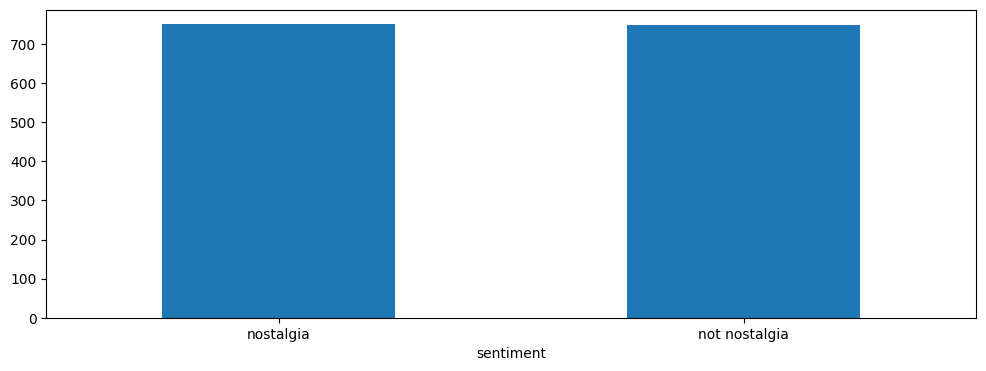

In [35]:
plt.figure(figsize=(12, 4))

X.sentiment.value_counts().plot(kind="bar", rot=0)

plt.show()

In [36]:
X_sample.sentiment.value_counts()

sentiment
nostalgia        512
not nostalgia    488
Name: count, dtype: int64

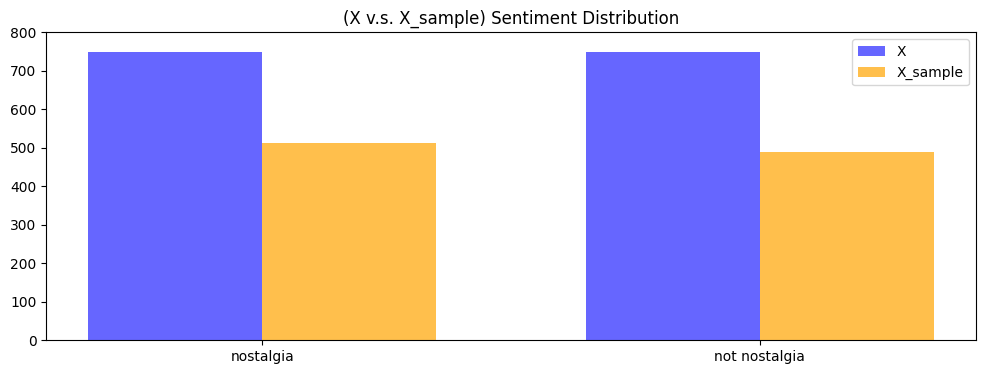

In [37]:
category_comparison = pd.DataFrame(
    {
        "X": X.sentiment.value_counts(),
        "X_sample": X_sample.sentiment.value_counts(),
    }
)

plt.figure(figsize=(12, 4))

bar_width = 0.35
index = np.arange(len(category_comparison))

plt.bar(index, category_comparison["X"], bar_width, label="X", color="blue", alpha=0.6)
plt.bar(
    index + bar_width,
    category_comparison["X_sample"],
    bar_width,
    label="X_sample",
    color="orange",
    alpha=0.7,
)

plt.title("(X v.s. X_sample) Sentiment Distribution")

plt.xticks(index + bar_width / 2, category_comparison.index, rotation=0)
plt.ylim(0, max(category_comparison.max()) + 50)
plt.legend()

plt.show()

---

### 5.2 Feature Creation

In [38]:
# takes a like a minute or two to process
X["unigrams"] = X["comment"].apply(lambda x: dmh.tokenize_text(x))

In [39]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [40]:
X[0:4]

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [41]:
list(X[:1]["unigrams"])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spaCy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data. 

---

### 5.3 Feature subset selection

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_counts = count_vect.fit_transform(
    X.comment
)  # learn the vocabulary and return document-term matrix

print(X_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

> - Interpret the value by index

In [43]:
count_vect.get_feature_names_out()[2035]

'loving'

> - Tokenizing the first record

In [44]:
# Tokenize

analyze = count_vect.build_analyzer()

In [45]:
print(f"{analyze(X['comment'][0])}")

['he', 'was', 'singer', 'with', 'golden', 'voice', 'that', 'love', 'to', 'hear', 'all', 'the', 'time', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', 'although', 'we', 'have', 'many', 'singers', 'now', 'but', 'can', 'vouch', 'for', 'jim', 'reeves', 'all', 'the', 'time', 'you', 'feel', 'relaxed', 'emotional', 'and', 'loving', 'thank', 'you', 'lord', 'for', 'his', 'life']


---

In [46]:
# We can check the shape of this matrix by:
X_counts.shape

(1499, 3730)

In [47]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [48]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [49]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

---

---


As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contains a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(tokenizer=analyze)  # analyze <CountVectorizer>

X_tfidf = tfidf_vectorizer.fit_transform(X["comment"])

print(X_tfidf[0])

  (np.int32(0), np.int32(1598))	0.10512815802912398
  (np.int32(0), np.int32(3570))	0.1395574769171071
  (np.int32(0), np.int32(2973))	0.13337780025660986
  (np.int32(0), np.int32(3650))	0.09117642312434776
  (np.int32(0), np.int32(1470))	0.17742470356320433
  (np.int32(0), np.int32(3534))	0.10560382174971122
  (np.int32(0), np.int32(3282))	0.08099760357962565
  (np.int32(0), np.int32(2028))	0.08426437228313143
  (np.int32(0), np.int32(3336))	0.05656163791989449
  (np.int32(0), np.int32(1606))	0.11892115591975148
  (np.int32(0), np.int32(233))	0.19791015577918225
  (np.int32(0), np.int32(3284))	0.1516330924946833
  (np.int32(0), np.int32(3328))	0.18797687737677285
  (np.int32(0), np.int32(1651))	0.22761435073116082
  (np.int32(0), np.int32(1512))	0.09515621480982876
  (np.int32(0), np.int32(1249))	0.19852539212933534
  (np.int32(0), np.int32(323))	0.10633155023896874
  (np.int32(0), np.int32(214))	0.14662969149477417
  (np.int32(0), np.int32(2341))	0.061599247801622355
  (np.int32(0), 

c:\Users\user\Documents\school_work\113-1-data_mining\lab_1\.venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [51]:
from sklearn.decomposition import PCA

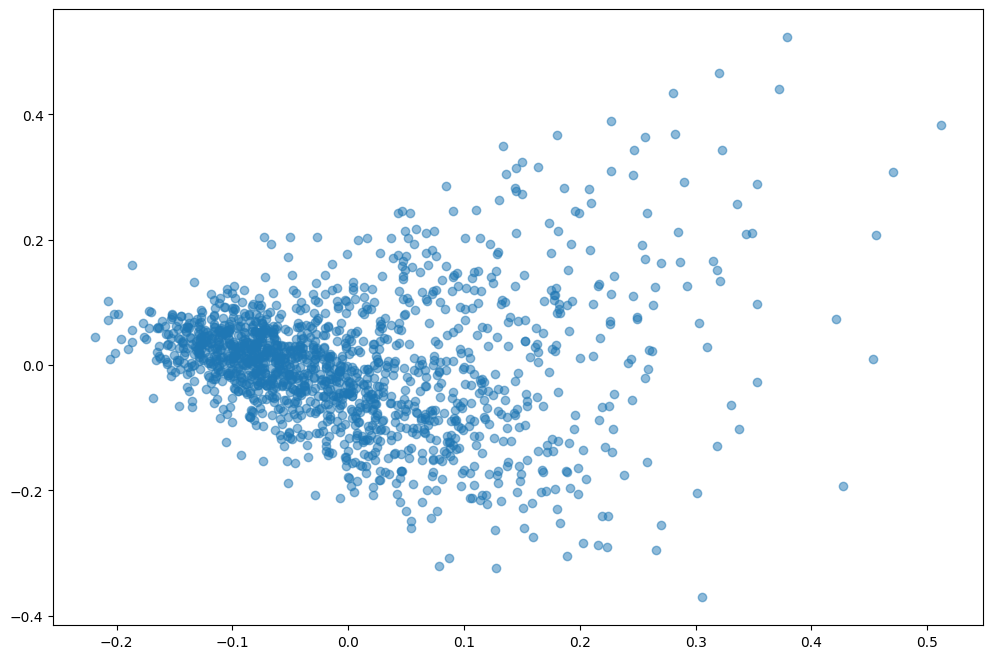

In [52]:
# Make 2D
pca = PCA(n_components=2)
X_tfidf_2d = pca.fit_transform(X_tfidf.toarray())  # Convert matrix to dense

plt.figure(figsize=(12, 8))
plt.scatter(X_tfidf_2d[:, 0], X_tfidf_2d[:, 1], alpha=0.5)

plt.show()

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer_2 = TfidfVectorizer(
    tokenizer=analyze, norm="l1"
)  # analyze <CountVectorizer>

X_tfidf_2 = tfidf_vectorizer_2.fit_transform(X["comment"])

print(X_tfidf_2[0])

  (np.int32(0), np.int32(1598))	0.01653949647419642
  (np.int32(0), np.int32(3570))	0.021956157519461058
  (np.int32(0), np.int32(2973))	0.020983927602623246
  (np.int32(0), np.int32(3650))	0.01434451204193287
  (np.int32(0), np.int32(1470))	0.027913694237903464
  (np.int32(0), np.int32(3534))	0.016614331214736402
  (np.int32(0), np.int32(3282))	0.012743109019873132
  (np.int32(0), np.int32(2028))	0.013257059901031732
  (np.int32(0), np.int32(3336))	0.008898672139691676
  (np.int32(0), np.int32(1606))	0.018709507290113433
  (np.int32(0), np.int32(233))	0.03113660873626861
  (np.int32(0), np.int32(3284))	0.02385597774853558
  (np.int32(0), np.int32(3328))	0.02957383596259985
  (np.int32(0), np.int32(1651))	0.035809880263969
  (np.int32(0), np.int32(1512))	0.014970640681339012
  (np.int32(0), np.int32(1249))	0.031233402018248646
  (np.int32(0), np.int32(323))	0.016728822546154126
  (np.int32(0), np.int32(214))	0.023068807738631455
  (np.int32(0), np.int32(2341))	0.009691224129940881
  (n

c:\Users\user\Documents\school_work\113-1-data_mining\lab_1\.venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


---
---

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [54]:
# first twenty features only
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [55]:
# obtain document index
plot_y = ["doc_" + str(i) for i in list(X.index)[0:20]]

In [56]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

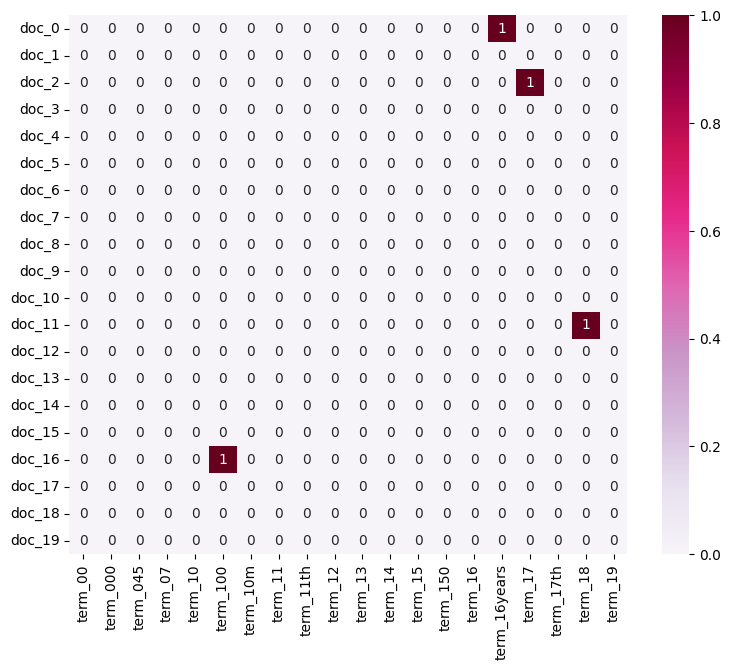

In [57]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

---

### 5.4 Attribute Transformation / Aggregation

In [58]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:, j].toarray()))

In [59]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [60]:
term_frequencies[0]  # sum of first term: 00

np.int64(1)

C:\Users\user\AppData\Local\Temp\ipykernel_24764\1004740150.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

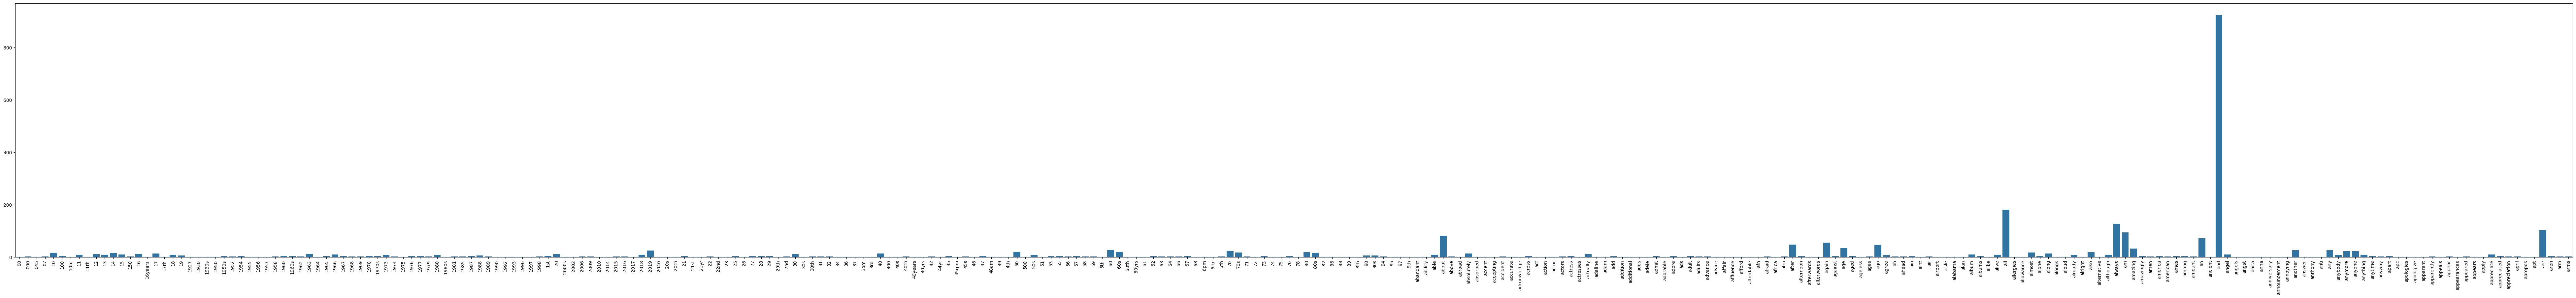

In [61]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)

---

In [62]:
df = pd.DataFrame(
    {
        "Feature": count_vect.get_feature_names_out(),
        "Frequency": term_frequencies,
    }
)

df = df.sort_values(by="Frequency", ascending=False).head(100)

fig = px.bar(df, x="Feature", y="Frequency")
fig.update_layout(
    title=f"Top 100 Term Frequencies",
)

fig.show()

---

In [63]:
import math


term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\user\AppData\Local\Temp\ipykernel_24764\1701314592.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

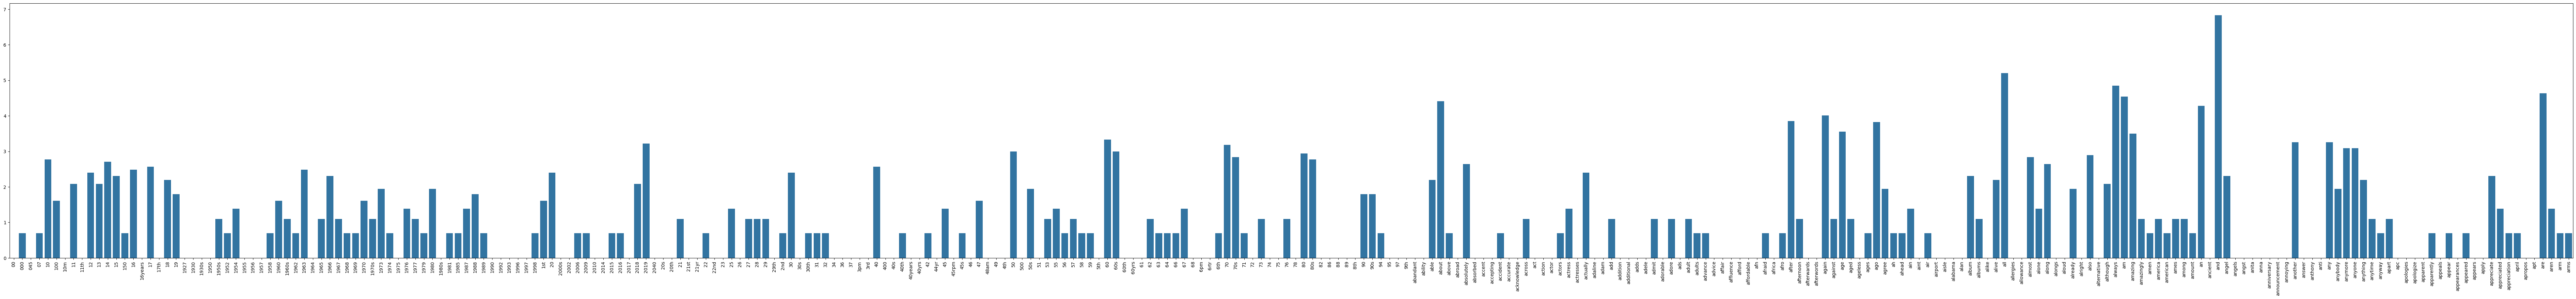

In [64]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(
    x=count_vect.get_feature_names_out()[:300], y=term_frequencies_log[:300]
)
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)

###  Finding frequent patterns
Perfect, so now that we know how to interpret a document-term matrix from our text data, we will see how to get extra insight from it, we will do this by mining frequent patterns. For this we will be using the PAMI library that we previously installed.

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each category
categories = X["sentiment"].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X["sentiment"] == category].copy()


# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(
        df["comment"]
    )  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df


# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [66]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number = 0  # You can change it from 0 to 3
print(
    f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:"
)
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Now we can see the number of unique words per category based on the column number in the new dataframe, feel free to **explore the changes of each category changing the vector number at the end**.

In the past sections we saw the behaviour of each word frequency in the documents, but we still want to generalize a little bit more so we can observe and determine the data that we are going to use to mine the patterns. For this we will group the terms in bins and we are going to plot their frequency. Again, feel free to change the category number to explore the different results.

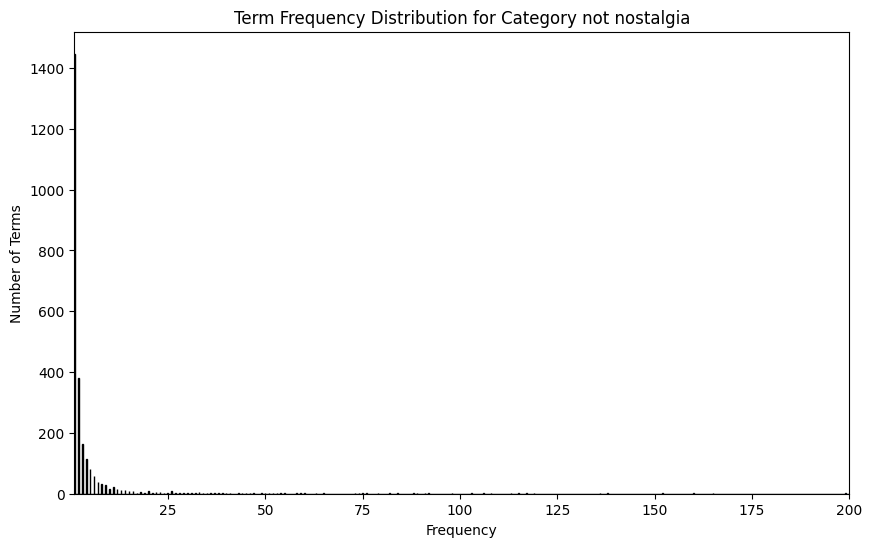

In [67]:
# Sum over all documents to get total frequency for each word
category_number = 0  # You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color="blue", edgecolor="black")
plt.title(f"Term Frequency Distribution for Category {categories[category_number]}")
plt.xlabel("Frequency")
plt.ylabel("Number of Terms")
plt.xlim(1, 200)
plt.show()

In [68]:
# IndexError: index 2 is out of bounds for axis 0 with size 2
category_number = 1  # You can change it from 0 to 3


word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()


# Sort the term frequencies in descending order


sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies


sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order


# Calculate the index corresponding to the top 5% most frequent terms


total_terms = len(sorted_counts)


top_5_percent_index = int(0.05 * total_terms)


# Get the indices of the top 5% most frequent terms


top_5_percent_indices = sorted_indices[:top_5_percent_index]


# Filter terms that belong to the top 5% based on their rank


filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]


print(f"Category: {categories[category_number]}")


print(f"Number of terms in top 5%: {top_5_percent_index}")


print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['neighborhood', 'neighbor', 'needed', 'nearly', 'nearer', 'nc', '16years', '150', '1954', '1930s', 'featured', 'imprinted', 'impossible', 'impersonate', 'insane', 'fathers', 'head', 'he', '1981', 'nicer', '15', '07', '1977', '1976', '1975', 'natural', 'naples', 'nana', 'nan', 'names', 'never', 'na', '21st', '20s', '2040', '2019', '2018', '2017', '2015', '2010', '2009', '2002', '2000s', 'musician', 'murray', 'munster', 'mummy', 'naver', 'happened', 'happen', 'hank', 'hanged', 'handball', '3pm', 'ms', 'mph', 'movie', 'move', 'myanmar', '30s', '29th', '29', '1980s', '1979', '21yr', '45s', '45rpm', '42', '40th', '40s', '400', 'hdqrs', 'nelson', 'had', 'habit', 'gut', 'gunner', 'gun', 'guessing', 'happening', '8th', '5th', '59', '58', '57', '53', '50s', '50', '46', '70s', 'mostly', 'morning', '27', '25', '22nd', '22', '61', '60', 'haired', 'hahaha', 'hd', 'hawaii', 'having', 'haven', 'hauntingly', 'haunting', 'hats', 'hatin

In [69]:
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [
    count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices
]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['neighborhood', 'neighbor', 'needed', 'nearly', 'nearer', 'nc', '16years', '150', '1954', '1930s', 'featured', 'imprinted', 'impossible', 'impersonate', 'insane', 'fathers', 'head', 'he', '1981', 'nicer', '15', '07']


> - Filter the un-important data at head and tail (which oftenly outliers).

In [70]:
category_number = 0  # You can change it from 0 to 3


# Filter the bottom 1% and top 5% words based on their sum across all documents


def filter_top_bottom_words_by_sum(
    term_document_df, top_percent=0.05, bottom_percent=0.01
):

    # Calculate the sum of each word across all documents

    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum

    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove

    total_words = len(sorted_words)

    top_n = int(top_percent * total_words)

    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%

    words_to_remove = pd.concat(
        [sorted_words.head(bottom_n), sorted_words.tail(top_n)]
    ).index

    # Return the DataFrame without the filtered words

    return term_document_df.drop(columns=words_to_remove)


# Apply the filtering function to each category

filtered_term_document_dfs = {}


for category in categories:

    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(
        term_document_dfs[category]
    )

term_document_dfs = filtered_term_document_dfs

# Example: Display the filtered DataFrame for one of the categories

print(
    f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:"
)

filtered_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,14,15,150,...,young,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

#### Transaction Database

In [71]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace(".", "_")

    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f"td_freq_db_{category_safe}.csv", ">=", 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


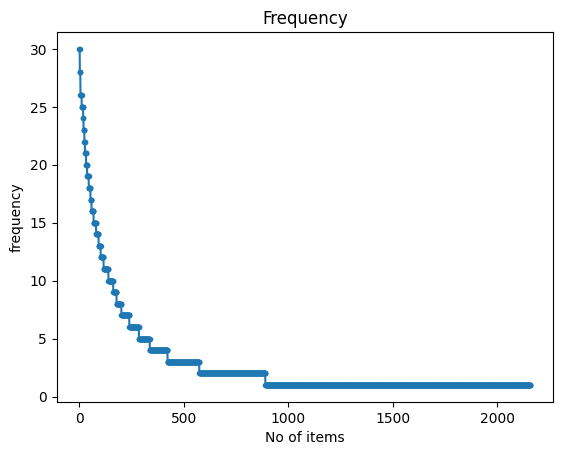

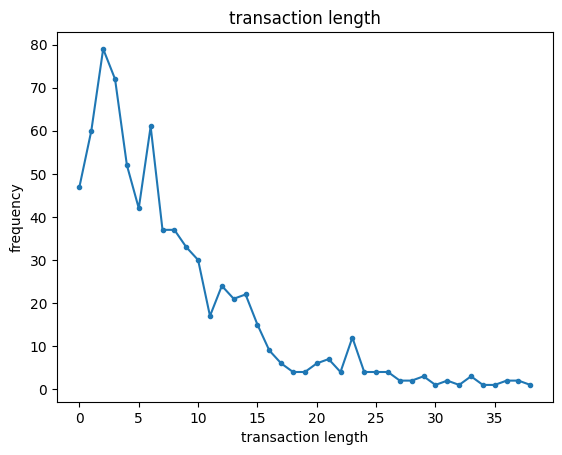

In [72]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase("td_freq_db_nostalgia.csv")
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.399463806970509
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.940834266064001
Variance in Transaction Sizes : 35.3408856181514
Sparsity : 0.9965660409619908


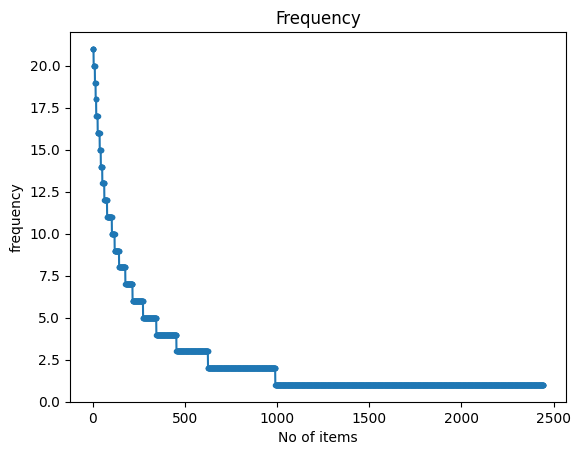

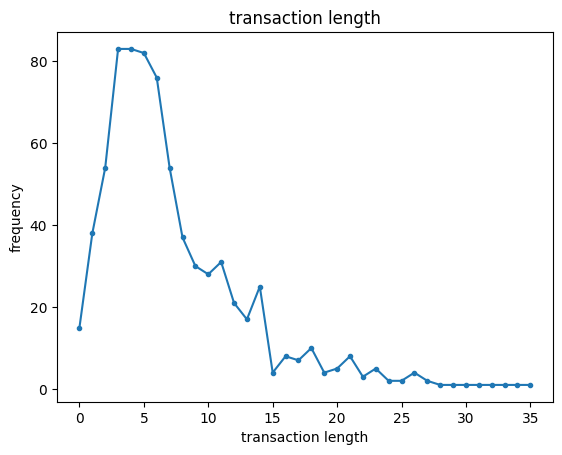

In [73]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase("td_freq_db_not nostalgia.csv")
obj.run()
obj.printStats()
obj.plotGraphs()

When we set a minimum support threshold (minSup) for finding frequent patterns, we are looking for a good balance. We want to capture important patterns that show real connections in the data, but we also want to avoid too many unimportant patterns. For this dataset, we've chosen a minSup of 9. We have done this after observing the following:

In [74]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
obj1 = alg.FPGrowth(iFile="td_freq_db_nostalgia.csv", minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia = obj1.getPatternsAsDataFrame()
print(
    "Total No of patterns: " + str(len(frequentPatternsDF_nostalgia))
)  # print the total number of patterns
print("Runtime: " + str(obj1.getRuntime()))  # measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.2276451587677002


In [75]:
obj1.save("freq_patterns_nostalgia_minSup9.txt")  # save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,go,28
178,takes,30


In [76]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
obj2 = alg.FPGrowth(iFile="td_freq_db_not nostalgia.csv", minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia = obj2.getPatternsAsDataFrame()
print(
    "Total No of patterns: " + str(len(frequentPatternsDF_not_nostalgia))
)  # print the total number of patterns
print("Runtime: " + str(obj2.getRuntime()))  # measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.006055116653442383


In [77]:
obj2.save("freq_patterns_not_nostalgia_minSup9.txt")  # save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,every,21
140,loved,21
141,classic,21
142,them,21


Now that we've extracted the transactional patterns from our databases, the next step is to integrate them effectively with our initial data for further analysis. One effective method is to identify and use only the unique patterns that are specific to each category. This involves filtering out any patterns that are common across multiple categories.

The reason for focusing on **unique patterns** is that they can **significantly improve the classification process**. When a document contains these distinctive patterns, it provides clear, category-specific signals that help our model more accurately determine the document's category. This approach ensures that the patterns we use enhance the model's ability to distinguish between different types of content.

In [78]:
import pandas as pd

# We group together all of the dataframes related to our found patterns
dfs = [
    frequentPatternsDF_nostalgia,
    frequentPatternsDF_not_nostalgia,
]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df["Patterns"]:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df["Patterns"].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by="Support", ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
127    takes       30
125     ever       28
126    would       28
123       or       26
120      kid       26
..       ...      ...
135   others        9
136     pure        9
137   please        9
138   though        9
139   wonder        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [79]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X["comment"])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X["tokenized_text"] = X["comment"].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df["Patterns"])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df["Patterns"]:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X["tokenized_text"].apply(
        lambda x: 1 if pattern_words.issubset(x) else 0
    )

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,almost,end,family,ones,things,others,pure,please,though,wonder
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


---

### 5.5 Dimensionality Reduction
Dimensionality reduction is a powerful technique for tackling the "curse of dimensionality," which commonly arises due to data sparsity. This technique is not only beneficial for visualizing data more effectively but also simplifies the data by reducing the number of dimensions without losing significant information. For a deeper understanding, please refer to the additional notes provided.


In [80]:
# Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [81]:
X_pca_tdm.shape

(1499, 2)

In [82]:
X_tsne_tdm.shape

(1499, 2)

In [83]:
X_umap_tdm.shape

(1499, 2)

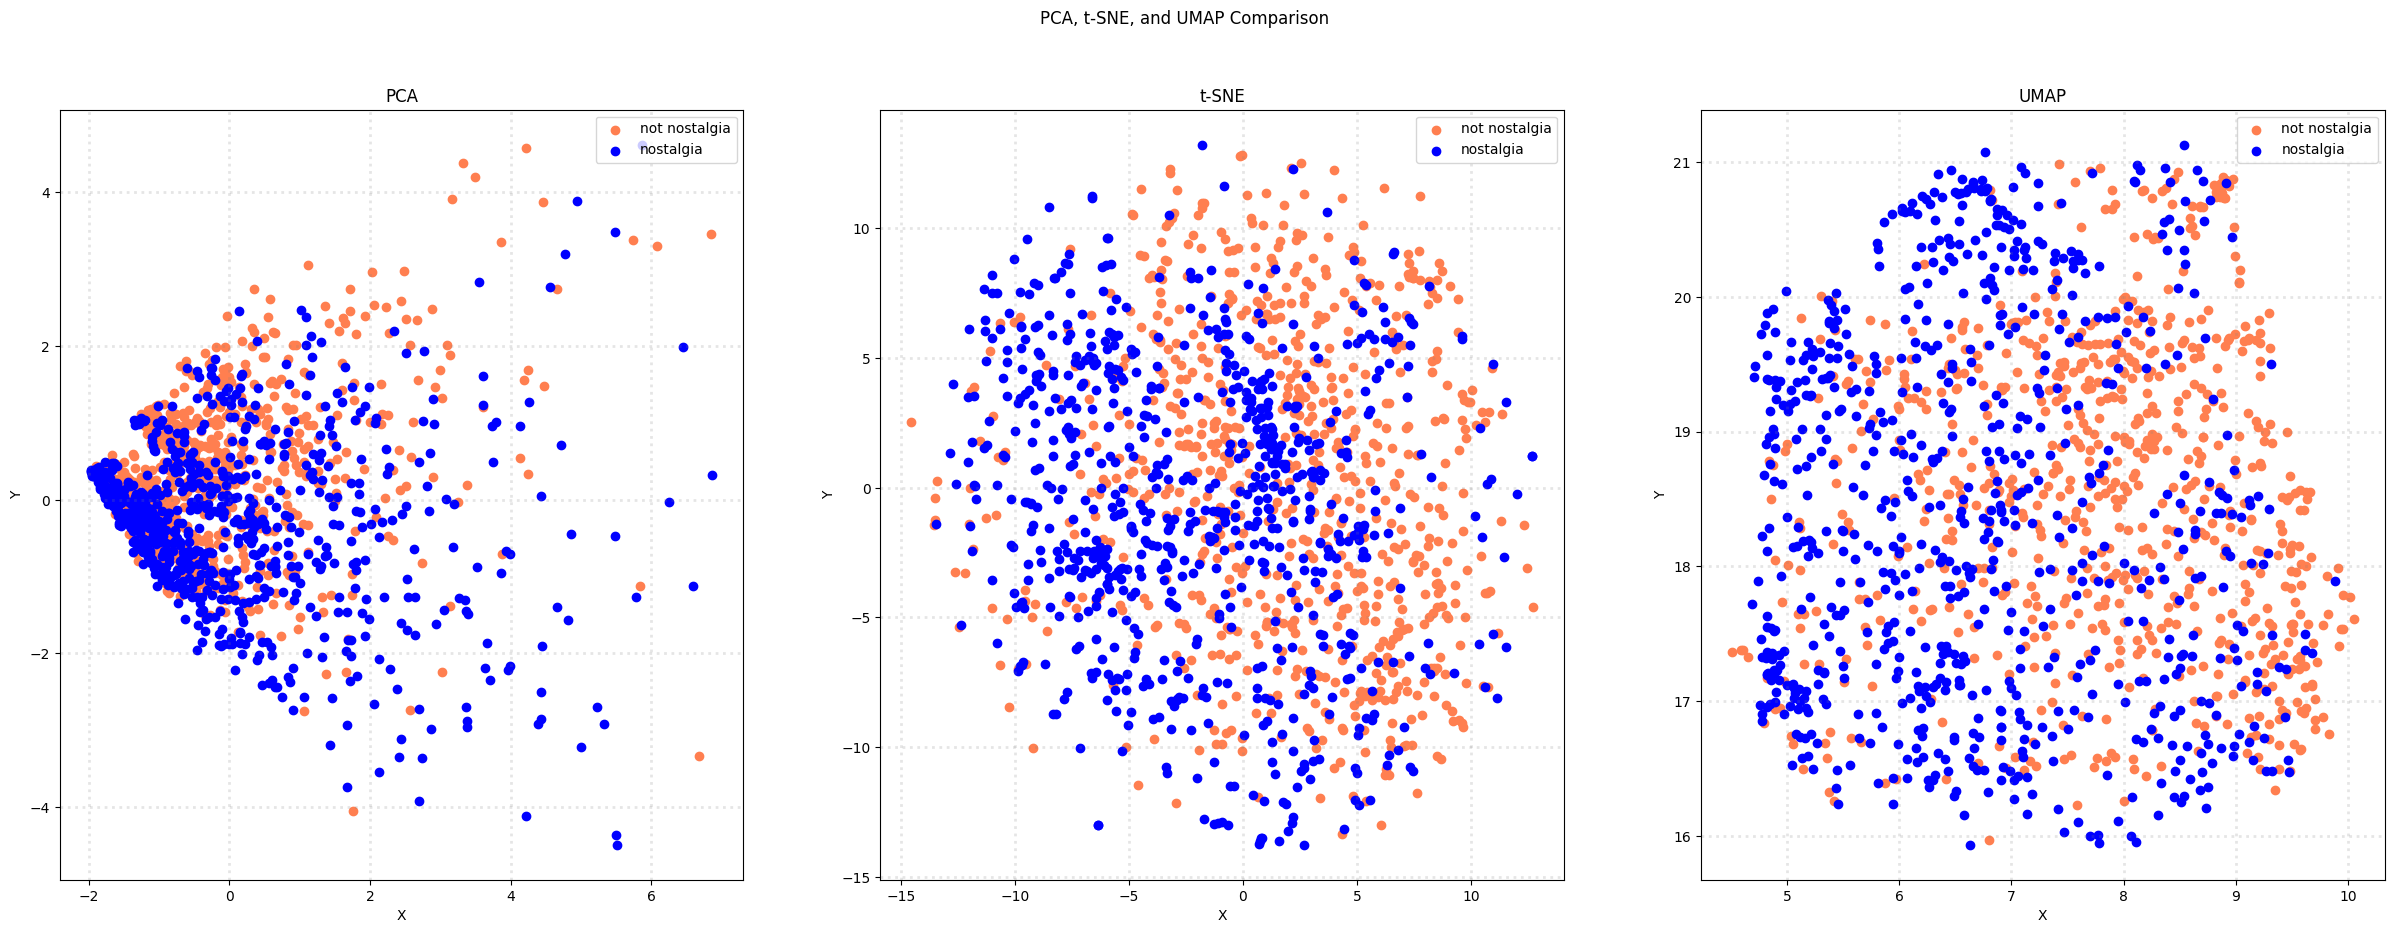

In [84]:
# Plot the results in subplots
col = ["coral", "blue", "black", "orange"]
categories = X["sentiment"].unique()

fig, axes = plt.subplots(
    1, 3, figsize=(30, 10)
)  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle("PCA, t-SNE, and UMAP Comparison")


# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X["sentiment"] == category].T[0]
        ys = X_reduced[X["sentiment"] == category].T[1]
        ax.scatter(xs, ys, c=c, marker="o", label=category)

    ax.grid(color="gray", linestyle=":", linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend(loc="upper right")


# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, "PCA")
plot_scatter(axes[1], X_tsne_tdm, "t-SNE")
plot_scatter(axes[2], X_umap_tdm, "UMAP")

plt.show()

From the 2D PCA visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. In the t-SNE graph we observe a more scattered distribution, but still intermixing with all the categories. And with the UMAP graph, the limits for the data seem pretty well defined, two categories seem to have some points well differentiated from the other classes, but most of them remain intermixed. The algorithms were applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

Now let's try in tandem with our pattern augmented data:

In [85]:
# This might take a couple of minutes to execute
# Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

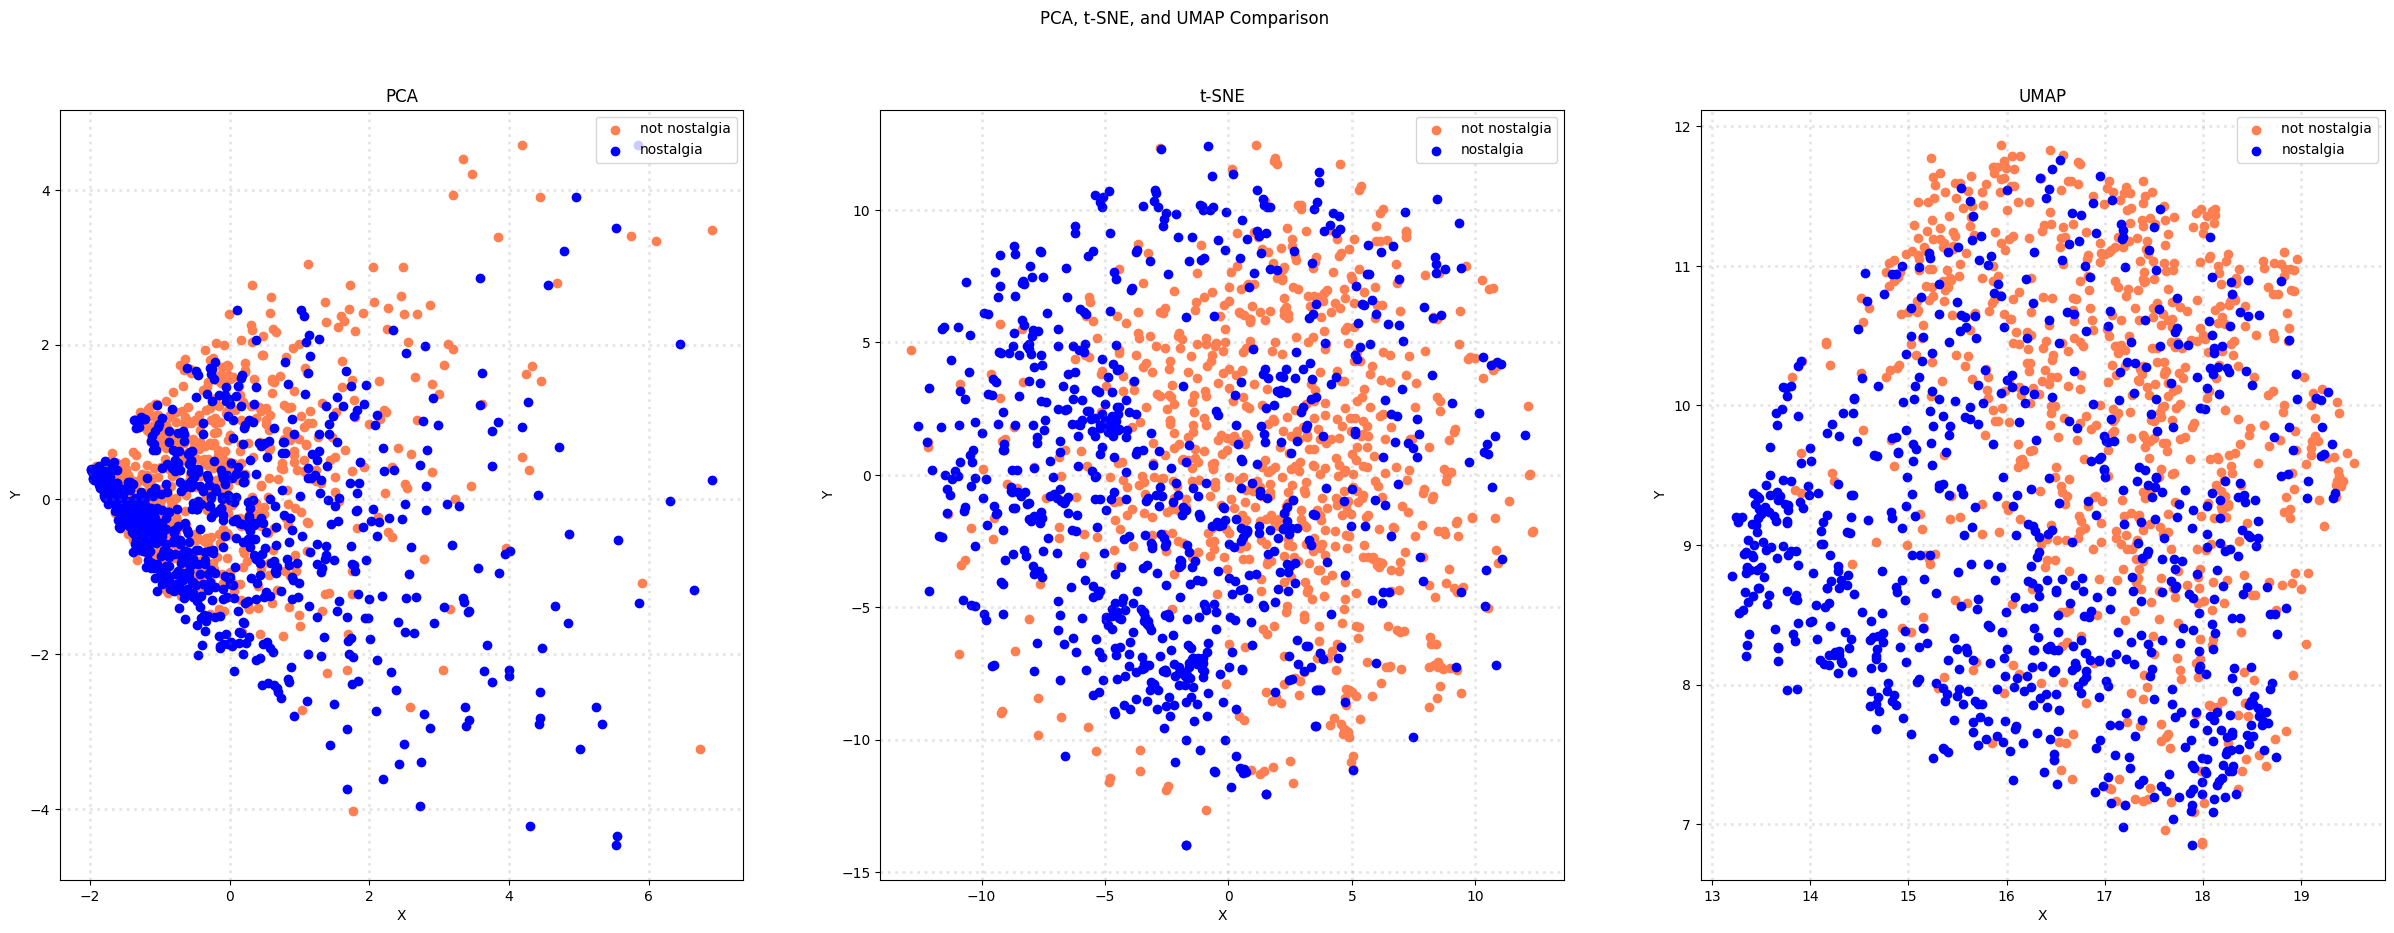

In [86]:
# Plot the results in subplots
col = ["coral", "blue", "black", "orange"]
categories = X["sentiment"].unique()

fig, axes = plt.subplots(
    1, 3, figsize=(30, 10)
)  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle("PCA, t-SNE, and UMAP Comparison")


# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X["sentiment"] == category].T[0]
        ys = X_reduced[X["sentiment"] == category].T[1]
        ax.scatter(xs, ys, c=c, marker="o", label=category)

    ax.grid(color="gray", linestyle=":", linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend(loc="upper right")


# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, "PCA")
plot_scatter(axes[1], X_tsne_aug, "t-SNE")
plot_scatter(axes[2], X_umap_aug, "UMAP")

plt.show()

We can see that our PCA visualization hasn't changed much from the previous version. This is likely because the original document-term matrix still dominates what the algorithm captures, overshadowing the new binary pattern data we added.

Looking at the t-SNE graph, it might seem different at first glance. However, upon closer inspection, it's almost the same but mirrored along the y-axis, with only slight changes in how the data points are placed. This similarity might be due to the stability of the t-SNE algorithm. Even small changes in the data can result in embeddings that look different but are structurally similar, indicating that the binary patterns may not have significantly altered the relationships among the data points in high-dimensional space.

The UMAP visualization shows the most noticeable changes—it appears more compact. This compactness could be because UMAP uses a more complex distance metric, which might be making it easier to see differences between closer and further points. The binary patterns could also be helping to reduce noise within categories, resulting in clearer, more coherent groups. However, the categories still appear quite mixed together.

Remember, just because you can't see clear groups in these visualizations doesn’t mean that a machine learning model won’t be able to classify the data correctly. These techniques are mainly used to help us see and understand complex data in a simpler two or three-dimensional space. However, they have their limits and might not show everything a computer model can find in the data. So, while these tools are great for getting a first look at your data, always use more methods and analyses to get the full picture.

---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [87]:
from sklearn import preprocessing

In [88]:
mlb = preprocessing.LabelBinarizer()

> - Attaching data then processing it

In [89]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [90]:
X["bin_category"] = mlb.transform(X["sentiment"]).tolist()

> - As we got only two types data in `sentiment`, it would be `二分法`

In [91]:
X[["sentiment", "comment", "bin_category"]][0:4]

,sentiment,comment,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,[1]


---

# 6. Data Exploration

Sometimes we got to see if there are any relation in the dataset, and comparing the similarity for certain tag/column is a simple way.

>- Picking three random data.

In [92]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1["comment"]
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2["comment"]
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3["comment"]
document_to_transform_3.append(random_record_3)

> - Checking the comments ready to become vector for comparing. 

In [93]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


> - Getting vector from the three and every sentence. 

In [94]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


> - Getting similarity to see if anything close, then seems not so relative for this three.

In [95]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(
    document_vector_count_1, document_vector_count_2, dense_output=True
)
cos_sim_count_1_3 = cosine_similarity(
    document_vector_count_1, document_vector_count_3, dense_output=True
)
cos_sim_count_2_3 = cosine_similarity(
    document_vector_count_2, document_vector_count_3, dense_output=True
)

# Print
print(f"Cosine Similarity using count bw 1 and 2: {cos_sim_count_1_2}")
print(f"Cosine Similarity using count bw 1 and 3: {cos_sim_count_1_3}")
print(f"Cosine Similarity using count bw 2 and 3: {cos_sim_count_2_3}")

Cosine Similarity using count bw 1 and 2: [[0.03217447]]
Cosine Similarity using count bw 1 and 3: [[0.02786391]]
Cosine Similarity using count bw 2 and 3: [[0.]]


> Consine Similarity is also often used in RAG structure to improve the LLM accuracy.

---

# 7. Data Classification

In [96]:
X["tag"] = X["sentiment"].apply(lambda x: 1 if x == "nostalgia" else 0)

In [97]:
# Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[["tag", "sentiment"]].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

print(target_names)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    tdm_df, X["sentiment"], test_size=0.3, random_state=42
)

['not nostalgia', 'nostalgia']


In [98]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(
    "\nClassification Report:\n",
    classification_report(y_test, y_pred, target_names=target_names, digits=4),
)

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8222    0.9528    0.8827       233
    nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [101]:
# Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[["tag", "sentiment"]].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    augmented_df, X["sentiment"], test_size=0.3, random_state=42
)

In [102]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,almost,end,family,ones,things,others,pure,please,though,wonder
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,almost,end,family,ones,things,others,pure,please,though,wonder
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(
    "\nClassification Report:\n",
    classification_report(y_test, y_pred, target_names=target_names, digits=4),
)

Accuracy: 0.8622222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8155    0.9485    0.8770       233
    nostalgia     0.9330    0.7696    0.8434       217

     accuracy                         0.8622       450
    macro avg     0.8742    0.8590    0.8602       450
 weighted avg     0.8721    0.8622    0.8608       450



---
---

In [106]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Split your data into train and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X["comment"], X["sentiment"], test_size=0.2, random_state=42
)

https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [108]:
count_vect = CountVectorizer(tokenizer=analyze)
X_train_counts = count_vect.fit_transform(X_train_2)
X_test_counts = count_vect.transform(X_test_2)

nb_count = MultinomialNB()
nb_count.fit(X_train_counts, y_train_2)

y_pred_count = nb_count.predict(X_test_counts)
print(
    "Word Frequency (MultinomialNB) Accuracy:",
    accuracy_score(y_test_2, y_pred_count),
)
print(classification_report(y_test_2, y_pred_count))

Word Frequency (MultinomialNB) Accuracy: 0.8533333333333334
               precision    recall  f1-score   support

    nostalgia       0.81      0.94      0.87       158
not nostalgia       0.92      0.76      0.83       142

     accuracy                           0.85       300
    macro avg       0.86      0.85      0.85       300
 weighted avg       0.86      0.85      0.85       300



c:\Users\user\Documents\school_work\113-1-data_mining\lab_1\.venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.ComplementNB.html

In [109]:
tfidf_vect = TfidfVectorizer(tokenizer=analyze)
X_train_tfidf = tfidf_vect.fit_transform(X_train_2)
X_test_tfidf = tfidf_vect.transform(X_test_2)

nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train_tfidf, y_train_2)

y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print("TF-IDF Model (ComplementNB) Accuracy:", accuracy_score(y_test_2, y_pred_tfidf))
print(classification_report(y_test_2, y_pred_tfidf))

TF-IDF Model (ComplementNB) Accuracy: 0.8366666666666667
               precision    recall  f1-score   support

    nostalgia       0.79      0.93      0.86       158
not nostalgia       0.90      0.73      0.81       142

     accuracy                           0.84       300
    macro avg       0.85      0.83      0.83       300
 weighted avg       0.85      0.84      0.83       300



c:\Users\user\Documents\school_work\113-1-data_mining\lab_1\.venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Before the test, with the reading of the official doc that direct that one is suit for discrete features and one for inbalanced, and indead reflect on our test data. 

We got better accuracy with the same of which we use in part 1 -- MultinomialNB. 

Although the data is indeed not balanced from our previous processing results, but with the 'comment' that not a valid and relative data for each, the count and weight for 'setiment' become obvious. 